<a href="https://colab.research.google.com/github/SERVIR/flood_mapping_intercomparison/blob/main/notebooks/Section_B_Obtaining_Reference_Imagery.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Introduction

In this Section, we will obtain very high-resolution (VHR) optical imagery on the specific date of interest. This will allow us to conduct image interpretation and obtain a reference dataset which we will use to assess the performance of the various flood products. **This section is intended to be run after Module 5 and before Module 6**

This workflow will show you how to gain access to optical imagery that is very high resolution (< 5 meters). This commercial imagery for this project was obtained using the following pathways:

- Planet Education and Research Program
  - Open to all researchers and educators
- NASA Commercial Smallsat Data Acquisition (CSDA) Program
  - Open to NASA employees and contractors.

This section will show you how to obtain imagery from the platforms, then upload it to Google Earth Engine. This section assumes that you are already registered with CSDA and or Planet's Education and Research Program.

# Part 1: Planet Education and Research Program

In this notebook we will look at two methods of ordering imagery from planet.

In Method 1, we will be more selective about which areas we order imagery for. This is because on my Planet Explorer plan, I have access to a limited amount of imagery per month.

In Method 2, we will order planet imagery for the entire area of interest. Use this method if you have a more advanced plan and do not need to judiciously order Planet Data.

### Part 1 Step 1: Import Necessary Packages

In [ ]:
#import numpy as np
#import pandas as pd
from google.colab import drive
from osgeo import gdal
import os
import ee
import subprocess
import glob
#import matplotlib.pyplot as plt
import geemap

In order to continue running this script, you need to be associated with a Google Cloud Project. Now, we have to authenticate and initialize earth engine. After you run the code below, click through the pop-up window to login to the Google Account associated with your Google Earth Engine account. Click "Continue" until you have returned to this notebook and a green checkmark appears to the left of the code cell below.

In [ ]:
ee.Authenticate()

### MODIFIABLE VARIABLE ALERT

In [ ]:
myproject = 'servir-sco-assets'                                             # Enter in your Google Earth Engine project
my_gee_folder = 'users/mickymags/flood_intercomparison_chad_09_26'          # Enter in the Google Earth Engine folder you are working in
my_Gdrive_folder = 'Flood_Intercomparison'
myprojection = 'EPSG:32633'
my_description = 'chad_09_26'                                               # Enter in a description for your case study that we will use in our file exports.

In [ ]:
ee.Initialize(project = myproject)

In [ ]:
aoi = ee.FeatureCollection(my_gee_folder + '/aoi')

# Get the coordinates of the center of the AOI for mapping purposes
aoi_centroid = aoi.geometry().centroid()             # Get the center of the AOI
lon = aoi_centroid.coordinates().get(0).getInfo()    # Extract the longitude from the centroid
lat = aoi_centroid.coordinates().get(1).getInfo()    # Extract the latitude from the centroid

# Part 1 -- Method 1

As mentioned earlier, in this method we are going to find some areas where our optical sensors got a clear view of the ground, and we have some flooding

We want to find the area where all optical sensors had a clear view of the ground.

In [ ]:
vfm = ee.Image(my_gee_folder + '/vfm/vfm_mosaic')
mcdwd = ee.Image(my_gee_folder + '/mcdwd/mcdwd_mosaic')
dswx_hls = ee.Image(my_gee_folder + '/dswx_hls/dswx_hls_mosaic')
dswx_s1 = ee.Image(my_gee_folder + '/dswx_s1/dswx_s1_mosaic')
gfm = ee.Image(my_gee_folder + '/gfm/gfm_mosaic')
hydrosar = ee.Image(my_gee_folder + '/hydrosar/hydrosar_mosaic')

vfm_mask = vfm.eq(2)
gfm_mask = gfm.eq(2)
mcdwd_mask = mcdwd.eq(2)
dswx_hls_mask = dswx_hls.eq(2)
dswx_s1_mask = dswx_s1.eq(2)

final_mask = vfm_mask.eq(1).Or(gfm_mask.eq(1)).Or(mcdwd_mask.eq(1)).Or(dswx_hls_mask.eq(1)).Or(dswx_s1_mask.eq(1))
all_water = vfm.eq(1).And(mcdwd.eq(1)).And(dswx_hls.eq(1)).And(dswx_s1.eq(1))

In [ ]:
mask_vp = {
    'min': 0,
    'max': 1,
    'palette': ['000000', 'FFFFFF']
}

water_vp = {
    'min': 0,
    'max': 2,
    'palette': ['000000', 'add8e6', 'FFFFFF'] # black, light blue, white
}

In [ ]:
Map = geemap.Map(center = (lat, lon), zoom = 5)

Map.addLayer(all_water, water_vp, 'All floods')
Map.addLayer(gfm, water_vp, 'GFM')
Map.addLayer(final_mask, mask_vp, 'Final Mask')

Map.addLayerControl()
Map

Map(center=[11.603838129040273, 18.61979504880998], controls=(WidgetControl(options=['position', 'transparent_…

- Step 1: Use the above map to find some areas where the "final mask" image is black, but the "all_water" image is blue.
- Step 2: Draw a bounding box around the tool.
- Step 3: Note the lat and longitude of the point in the lower-left corner using the inspector tool (wrench icon in the upper right of the map display --> icon with an i in a blue square --> click on the map).
- Step 4: Do the same for the upper right.
- Step 5: Change the variables below based on these bounding boxes.

### MODIFIABLE VARIABLE ALERT

In [ ]:
rect_1 = ee.Geometry.Rectangle(17.883768221, 9.156332560, 18.438421666, 10.077037154)
rect_2 = ee.Geometry.Rectangle(17.709866787, 7.514980942, 17.800499311, 8.079625032)
rect_3 = ee.Geometry.Rectangle(18.919120086, 13.708701176, 19.310177252, 13.950560981)
#rect_4 = ee.Geometry.Rectangle()                                                               # Enter in points in the following order: xmin, ymin, xmax, ymax
# Add more rectangle variables as needed
geemap.ee_export_vector_to_drive(ee.FeatureCollection(rect_1), description = my_description + 'subregion_1', fileFormat='GeoJSON')
geemap.ee_export_vector_to_drive(ee.FeatureCollection(rect_2), description = my_description + 'subregion_2', fileFormat='GeoJSON')
geemap.ee_export_vector_to_drive(ee.FeatureCollection(rect_3), description = my_description + 'subregion_3', fileFormat='GeoJSON')

Exporting chad_09_26subregion_1... Please check the Task Manager from the JavaScript Code Editor.
Exporting chad_09_26subregion_2... Please check the Task Manager from the JavaScript Code Editor.
Exporting chad_09_26subregion_3... Please check the Task Manager from the JavaScript Code Editor.


- Step 6: Open your Google Drive
- Step 7: Download the GEOJSON file to your laptop
- Step 8: Open [Planet Explorer](https://www.planet.com/explorer/)
- Step 9: Login (upper right)
- Step 10: Click the upload area of interest icon towards the lower right of the window as shwon in the image below

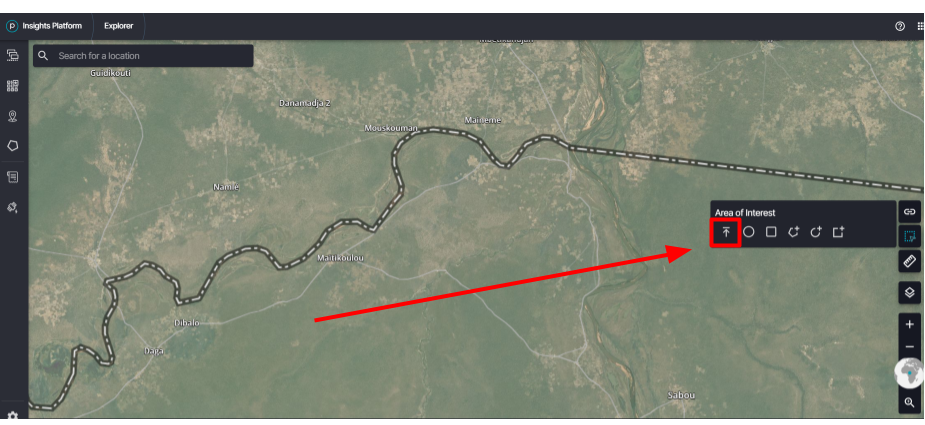

- Step 11: Navigate to the geojson file we downloaded from Google Drive
- Step 12: Click the "Daily Scenes" tab in the upper left corner.
- Step 13: Click "Dates"
- Step 14: Select the date of interest for the flood event as your start date as well as end date.
- Step 15: Click the add scenes to cart button, then click order scenes
- Step 16: Select GeoTiff, name your order, select the assets you want (I chose 4 band surface reflectance), then composite all items
- Step 17: Click Order in the bottom right
- Step 18: Click My orders on the left hand side to view the progress of your order. In a couple minutes - hours, you will be able to click download zip to download the data to your local computer
- Step 19: Upload the imagery to Google Earth Engine in your parent directory, creating a new folder for reference_imagery

Repeat steps 1 - 19 for various scenes in your AOI. If you have multiple planet scenes, name them "pt1", "pt2", etc

# Method 2: Non-Judicious Downloading of Planet Imagery

When we order Planet Imagery, we can only composite images that are smaller than 9,000 square kilometers in size. To avoid having to manually upload hundreds or even thousands of planet scenes to Google Earth Engine, let's programmatically split this area of interest up into tiles less than 9,000 square kilometers in area.

In [ ]:
aoi_area_sqkm = aoi.geometry().area().divide(1e6).getInfo()
print("The area of the region of interest is {0:0f} square kilometers".format(aoi_area_sqkm))

The area of the region of interest is 34452.477202 square kilometers


In [ ]:
covering_grid = aoi.geometry().coveringGrid(myprojection, 9e4)

In [ ]:
def clipper(feature, roi):
  return ee.Feature(feature).clip(roi)

In [ ]:
aoi.size().getInfo()

1

In [ ]:
num_tiles = covering_grid.size().getInfo()

first_tile = covering_grid.toList(num_tiles).get(0)
tilefeat = ee.Feature(first_tile)
aoi_single = aoi.first()
tile_clipped = tilefeat.intersection(aoi_single, 1)

print(tile_clipped.getInfo())

for j in range(num_tiles):
  my_tile = covering_grid.toList(num_tiles).get(j)
  tilefeat = ee.Feature(my_tile)
  aoi_single = aoi.first()
  tile_clip = ee.FeatureCollection(tilefeat.intersection(aoi_single, 1))

  geemap.ee_export_vector_to_drive(
      tile_clip, folder=my_Gdrive_folder, description = 'tiled_aoi_pt' + str(j+1), fileFormat = 'GeoJSON'
  )

{'type': 'Feature', 'geometry': {'type': 'Polygon', 'coordinates': [[[17.80760469380117, 7.330875883870842], [17.808820612919853, 7.522450683265275], [17.81014719042019, 7.725733034476104], [17.811510223913512, 7.929013223307201], [17.812909800051166, 8.132291193868232], [17.7420453905997, 8.132775402676703], [17.73576015408513, 8.101524471608888], [17.68341615928769, 7.841418273540238], [17.631072215678838, 7.58133007630393], [17.598400163612546, 7.418530687662863], [17.589698436869, 7.374811440270032], [17.80760469380117, 7.330875883870842]]]}, 'id': '8,9', 'properties': {}}
Exporting tiled_aoi_pt1... Please check the Task Manager from the JavaScript Code Editor.
Exporting tiled_aoi_pt2... Please check the Task Manager from the JavaScript Code Editor.
Exporting tiled_aoi_pt3... Please check the Task Manager from the JavaScript Code Editor.
Exporting tiled_aoi_pt4... Please check the Task Manager from the JavaScript Code Editor.
Exporting tiled_aoi_pt5... Please check the Task Manager

Now, follow Steps 6 - 19 in Method 1 to obtain the planet imagery for each tile. Repeat for all tiles.

# Part 2: CSDA

NASA's Commercial Smallsat Data Acquisition (CSDA) program gives access to commercial data.

- Step 1: Navigate to the [Smallsat Data Explorer Page](https://csdap.earthdata.nasa.gov/explore/)
- Step 2: Upload your area of interest and select your date of interest.
- Step 3: If you do not see any imagery, place a custom order via [the CSDA Data Request Form](https://csdap.earthdata.nasa.gov/signup/vendor-data-request-form/)
- Step 4: After waiting (approx four to five business days), you will receive an email stating that your data is ready for download. Continue with the steps below
- Step 5: Run the code below

In [ ]:
Map = geemap.Map(center = (lat, lon), zoom = 5)

Map.addLayer(all_water, water_vp, 'All floods')
Map.addLayer(gfm, water_vp, 'GFM')
Map.addLayer(final_mask, mask_vp, 'Final Mask')

Map.addLayerControl()
Map

Map(center=[11.603838129040273, 18.61979504880998], controls=(WidgetControl(options=['position', 'transparent_…

- Step 6: Use the above map to find some areas where the "final mask" image is black, but the "all_water" image is blue.
- Step 7: Draw a bounding box around the tool.
- Step 8: Note the lat and longitude of the point in the lower-left corner using the inspector tool (wrench icon in the upper right of the map display --> icon with an i in a blue square --> click on the map).
- Step 9: Do the same for the upper right.
- Step 10: Change the variables below based on these bounding boxes.

In [ ]:
rect_a = ee.Geometry.Rectangle(17.883768221, 9.156332560, 18.438421666, 10.077037154)
rect_b = ee.Geometry.Rectangle(17.709866787, 7.514980942, 17.800499311, 8.079625032)
rect_c = ee.Geometry.Rectangle(18.919120086, 13.708701176, 19.310177252, 13.950560981)
#rect_d = ee.Geometry.Rectangle()                                                               # Enter in points in the following order: xmin, ymin, xmax, ymax
# Add more rectangle variables as needed
geemap.ee_export_vector_to_drive(ee.FeatureCollection(rect_a), description = my_description + '_subregion_1', fileFormat='GeoJSON')
geemap.ee_export_vector_to_drive(ee.FeatureCollection(rect_b), description = my_description + '_subregion_2', fileFormat='GeoJSON')
geemap.ee_export_vector_to_drive(ee.FeatureCollection(rect_c), description = my_description + '_subregion_3', fileFormat='GeoJSON')

Exporting chad_09_26_subregion_1... Please check the Task Manager from the JavaScript Code Editor.
Exporting chad_09_26_subregion_2... Please check the Task Manager from the JavaScript Code Editor.
Exporting chad_09_26_subregion_3... Please check the Task Manager from the JavaScript Code Editor.


* Step 11: Open Google Drive
* step 12: Download the area of interest files to your personal laptop.
* Step 13: Return to the [Smallsat Data Explorer Page](https://csdap.earthdata.nasa.gov/explore/)
* Step 14: Upload one of your sub-area of interests
* Step 15: Enter in the date of interest
* Step 16: You may have to click "select" all products
* Step 17: Download all imagery to your personal computer

# Part 3: Uploading the Reference Data

At this point you should have some high resolution optical imagery on your home computer. Now let's upload this to our google drive.

If you are working with Planet data, we want to upload both the imagery as well as the Usable Data Mask (UDM2) that comes with it. If you downloaded your imagery from CSDA, you will have a number of images and UDMs to chose from. In this case we will be using the ortho_analytic_8b image and the ortho_udm2 UDM.

In [ ]:
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
cd drive/MyDrive/Flood_Intercomparison/Case_Studies/confirmed_case_studies/chad_09_26/REFERENCE/

/content/drive/MyDrive/Flood_Intercomparison/Case_Studies/confirmed_case_studies/chad_09_26/REFERENCE


In [ ]:
pwd

'/content/drive/MyDrive/Flood_Intercomparison/Case_Studies/confirmed_case_studies/chad_09_26/REFERENCE'

In [ ]:
ls

20240926_083846_63_24cc_3B_AnalyticMS_8b.tif  20240926_084056_01_24b3_3B_AnalyticMS_8b.tif
20240926_083846_63_24cc_3B_udm2.tif           20240926_084056_01_24b3_3B_udm2.tif
20240926_083848_73_24cc_3B_AnalyticMS_8b.tif  20240926_092429_74_24e5_3B_AnalyticMS_8b.tif
20240926_083848_73_24cc_3B_udm2.tif           20240926_092429_74_24e5_3B_udm2.tif
20240926_083850_83_24cc_3B_AnalyticMS_8b.tif  20240926_093004_19_250d_3B_AnalyticMS_8b.tif
20240926_083850_83_24cc_3B_udm2.tif           20240926_093004_19_250d_3B_udm2.tif
20240926_083919_68_24b3_3B_AnalyticMS_8b.tif  20240926_093006_57_250d_3B_AnalyticMS_8b.tif
20240926_083919_68_24b3_3B_udm2.tif           20240926_093006_57_250d_3B_udm2.tif
20240926_083921_78_24b3_3B_AnalyticMS_8b.tif  20240926_093008_96_250d_3B_AnalyticMS_8b.tif
20240926_083921_78_24b3_3B_udm2.tif           20240926_093008_96_250d_3B_udm2.tif
20240926_083949_34_24cc_3B_AnalyticMS_8b.tif  20240926_093113_38_250d_3B_AnalyticMS_8b.tif
20240926_083949_34_24cc_3B_udm2.tif         

In [ ]:
ls *udm*

20240926_083846_63_24cc_3B_udm2.tif  20240926_084053_91_24b3_3B_udm2.tif
20240926_083848_73_24cc_3B_udm2.tif  20240926_084056_01_24b3_3B_udm2.tif
20240926_083850_83_24cc_3B_udm2.tif  20240926_092429_74_24e5_3B_udm2.tif
20240926_083919_68_24b3_3B_udm2.tif  20240926_093004_19_250d_3B_udm2.tif
20240926_083921_78_24b3_3B_udm2.tif  20240926_093006_57_250d_3B_udm2.tif
20240926_083949_34_24cc_3B_udm2.tif  20240926_093008_96_250d_3B_udm2.tif
20240926_083951_44_24cc_3B_udm2.tif  20240926_093113_38_250d_3B_udm2.tif
20240926_083953_53_24cc_3B_udm2.tif  20240926_093115_76_250d_3B_udm2.tif
20240926_083955_63_24cc_3B_udm2.tif  20240926_093118_15_250d_3B_udm2.tif
20240926_083957_73_24cc_3B_udm2.tif  planet_region2_udm.tif
20240926_084051_82_24b3_3B_udm2.tif  planet_region3_udm.tif


Copy and paste the files above into the below cell and add or subtract variables depending on the number of files you have.

In [ ]:
ls

20240926_083846_63_24cc_3B_AnalyticMS_8b.tif  20240926_084056_01_24b3_3B_AnalyticMS_8b.tif
20240926_083846_63_24cc_3B_udm2.tif           20240926_084056_01_24b3_3B_udm2.tif
20240926_083848_73_24cc_3B_AnalyticMS_8b.tif  20240926_092429_74_24e5_3B_AnalyticMS_8b.tif
20240926_083848_73_24cc_3B_udm2.tif           20240926_092429_74_24e5_3B_udm2.tif
20240926_083850_83_24cc_3B_AnalyticMS_8b.tif  20240926_093004_19_250d_3B_AnalyticMS_8b.tif
20240926_083850_83_24cc_3B_udm2.tif           20240926_093004_19_250d_3B_udm2.tif
20240926_083919_68_24b3_3B_AnalyticMS_8b.tif  20240926_093006_57_250d_3B_AnalyticMS_8b.tif
20240926_083919_68_24b3_3B_udm2.tif           20240926_093006_57_250d_3B_udm2.tif
20240926_083921_78_24b3_3B_AnalyticMS_8b.tif  20240926_093008_96_250d_3B_AnalyticMS_8b.tif
20240926_083921_78_24b3_3B_udm2.tif           20240926_093008_96_250d_3B_udm2.tif
20240926_083949_34_24cc_3B_AnalyticMS_8b.tif  20240926_093113_38_250d_3B_AnalyticMS_8b.tif
20240926_083949_34_24cc_3B_udm2.tif         

In [ ]:
region1_8b_pt1_list_theta = ['20240926_083949_34_24cc_3B_AnalyticMS_8b.tif', '20240926_083951_44_24cc_3B_AnalyticMS_8b.tif',
              '20240926_083953_53_24cc_3B_AnalyticMS_8b.tif', '20240926_083955_63_24cc_3B_AnalyticMS_8b.tif']

In [ ]:
gdal.Warp('planet_region1_8b_pt1_theta.tif', region1_8b_pt1_list_theta, dstSRS = 'EPSG:32633')

<osgeo.gdal.Dataset; proxy of <Swig Object of type 'GDALDatasetShadow *' at 0x7d797f88d5f0> >

In [ ]:
region1_8b_pt2_list_theta = ['20240926_083957_73_24cc_3B_AnalyticMS_8b.tif', '20240926_092429_74_24e5_3B_AnalyticMS_8b.tif']

In [ ]:
gdal.Warp('planet_region1_8b_pt2_theta.tif', region1_8b_pt2_list_theta, dstSRS = 'EPSG:32633')

<osgeo.gdal.Dataset; proxy of <Swig Object of type 'GDALDatasetShadow *' at 0x7d797f88cb10> >

In [ ]:
region1_8b_pt3_list_theta = ['20240926_093113_38_250d_3B_AnalyticMS_8b.tif', '20240926_093115_76_250d_3B_AnalyticMS_8b.tif',
                       '20240926_093118_15_250d_3B_AnalyticMS_8b.tif']

In [ ]:
gdal.Warp('planet_region1_8b_pt3_theta.tif', region1_8b_pt3_list_theta, dstSRS = 'EPSG:32633')

<osgeo.gdal.Dataset; proxy of <Swig Object of type 'GDALDatasetShadow *' at 0x7d797f88c270> >

In [ ]:
region1_udm_list_iota = ['20240926_083949_34_24cc_3B_udm2.tif', '20240926_083951_44_24cc_3B_udm2.tif',
                    '20240926_083953_53_24cc_3B_udm2.tif', '20240926_083955_63_24cc_3B_udm2.tif',
                    '20240926_083957_73_24cc_3B_udm2.tif', '20240926_092429_74_24e5_3B_udm2.tif',
                    '20240926_093113_38_250d_3B_udm2.tif', '20240926_093115_76_250d_3B_udm2.tif',
                    '20240926_093118_15_250d_3B_udm2.tif']

In [ ]:
gdal.Warp('planet_region1_udm_iota.tif', region1_udm_list_iota, dstSRS = 'EPSG:32633')

<osgeo.gdal.Dataset; proxy of <Swig Object of type 'GDALDatasetShadow *' at 0x7d797f88d560> >

In [ ]:
ls

20240926_083846_63_24cc_3B_AnalyticMS_8b.tif  20240926_092429_74_24e5_3B_AnalyticMS_8b.tif
20240926_083846_63_24cc_3B_udm2.tif           20240926_092429_74_24e5_3B_udm2.tif
20240926_083848_73_24cc_3B_AnalyticMS_8b.tif  20240926_093004_19_250d_3B_AnalyticMS_8b.tif
20240926_083848_73_24cc_3B_udm2.tif           20240926_093004_19_250d_3B_udm2.tif
20240926_083850_83_24cc_3B_AnalyticMS_8b.tif  20240926_093006_57_250d_3B_AnalyticMS_8b.tif
20240926_083850_83_24cc_3B_udm2.tif           20240926_093006_57_250d_3B_udm2.tif
20240926_083919_68_24b3_3B_AnalyticMS_8b.tif  20240926_093008_96_250d_3B_AnalyticMS_8b.tif
20240926_083919_68_24b3_3B_udm2.tif           20240926_093008_96_250d_3B_udm2.tif
20240926_083921_78_24b3_3B_AnalyticMS_8b.tif  20240926_093113_38_250d_3B_AnalyticMS_8b.tif
20240926_083921_78_24b3_3B_udm2.tif           20240926_093113_38_250d_3B_udm2.tif
20240926_083949_34_24cc_3B_AnalyticMS_8b.tif  20240926_093115_76_250d_3B_AnalyticMS_8b.tif
20240926_083949_34_24cc_3B_udm2.tif         

In [ ]:
pwd

'/content/drive/MyDrive/Flood_Intercomparison/Case_Studies/confirmed_case_studies/chad_09_26/REFERENCE'

In [ ]:
region2_8b_list = ['20240926_084051_82_24b3_3B_AnalyticMS_8b.tif', '20240926_084053_91_24b3_3B_AnalyticMS_8b.tif',
                   '20240926_084056_01_24b3_3B_AnalyticMS_8b.tif']

In [ ]:
gdal.Warp('planet_region2_8b.tif', region2_8b_list, dstSRS = 'EPSG:32633')

<osgeo.gdal.Dataset; proxy of <Swig Object of type 'GDALDatasetShadow *' at 0x7d27250017d0> >

In [ ]:
region2_udm_list = ['20240926_084051_82_24b3_3B_udm2.tif', '20240926_084053_91_24b3_3B_udm2.tif',
                    '20240926_084056_01_24b3_3B_udm2.tif']

In [ ]:
gdal.Warp('planet_region2_udm.tif', region2_udm_list, dstSRS = 'EPSG:32633')

<osgeo.gdal.Dataset; proxy of <Swig Object of type 'GDALDatasetShadow *' at 0x7d27250001b0> >

In [ ]:
region3_8b_list = ['20240926_083846_63_24cc_3B_AnalyticMS_8b.tif', '20240926_083848_73_24cc_3B_AnalyticMS_8b.tif',
                   '20240926_083850_83_24cc_3B_AnalyticMS_8b.tif', '20240926_083919_68_24b3_3B_AnalyticMS_8b.tif',
                   '20240926_083921_78_24b3_3B_AnalyticMS_8b.tif', '20240926_093004_19_250d_3B_AnalyticMS_8b.tif',
                   '20240926_093006_57_250d_3B_AnalyticMS_8b.tif', '20240926_093008_96_250d_3B_AnalyticMS_8b.tif']

In [ ]:
gdal.Warp('planet_region3_8b.tif', region3_8b_list, dstSRS = 'EPSG:32633')

<osgeo.gdal.Dataset; proxy of <Swig Object of type 'GDALDatasetShadow *' at 0x7d2725000060> >

In [ ]:
region3_udm_list = ['20240926_083846_63_24cc_3B_udm2.tif', '20240926_083848_73_24cc_3B_udm2.tif',
                   '20240926_083850_83_24cc_3B_udm2.tif', '20240926_083919_68_24b3_3B_udm2.tif',
                   '20240926_083921_78_24b3_3B_udm2.tif', '20240926_093004_19_250d_3B_udm2.tif',
                   '20240926_093006_57_250d_3B_udm2.tif', '20240926_093008_96_250d_3B_udm2.tif']

In [ ]:
gdal.Warp('planet_region3_udm.tif', region3_udm_list, dstSRS = 'EPSG:32633')

<osgeo.gdal.Dataset; proxy of <Swig Object of type 'GDALDatasetShadow *' at 0x7d2725002af0> >

In [ ]:
pl_region1_pt1 = ee.Image("users/mickymags/flood_intercomparison_chad_09_26_take2/reference/planet_region1_8b_part1")
pl_region1_pt2 = ee.Image("users/mickymags/flood_intercomparison_chad_09_26_take2/reference/planet_region1_8b_part2")
pl_region1_pt3 = ee.Image("users/mickymags/flood_intercomparison_chad_09_26_take2/reference/planet_region1_8b_part3")
pl_region2 = ee.Image("users/mickymags/flood_intercomparison_chad_09_26_take2/reference/planet_region2_8b")
pl_region3 = ee.Image("users/mickymags/flood_intercomparison_chad_09_26_take2/reference/planet_region3_8b")

In [ ]:
pl_region1_pt1.bandNames().getInfo()

['b1', 'b2', 'b3', 'b4', 'b5', 'b6', 'b7', 'b8']

Band names of planet imagery

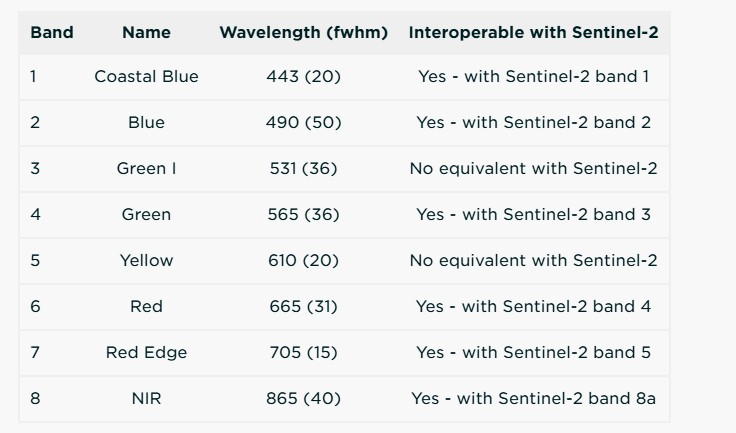

We want to calculate the normalized difference water index, which is calculated as NDWI = (Green - NIR) / (Green + NIR). We can use the .normalizedDifference method in Earth Engine to calculate this. We'll use b4 and b8 as these are the green and near infrared bands in planet imagery, respectively, as seen in the image above.

In [ ]:
trucolor = {
    'bands': ['b6', 'b4', 'b2'],
    'min': 2000,
    'max': 6000
}

ndwi_vp = {
    'min': -1,
    'max': 1,
    'palette': ['000000', 'FFFFFF']
}

In [ ]:
Map = geemap.Map(center = (lon, lat), zoom = 8)

Map.addLayer(pl_region1_pt1, trucolor, 'PL TruCol Region 1')
#Map.addLayer(ndwi_region1_pt1, ndwi_vp, 'NDWI')
Map

Map(center=[18.61979504880998, 11.603838129040273], controls=(WidgetControl(options=['position', 'transparent_…

In [ ]:

ndwi_region1_pt1 = pl_region1_pt1.normalizedDifference(['b4', 'b8'])
ndwi_region1_pt2 = pl_region1_pt2.normalizedDifference(['b4', 'b8'])
ndwi_region1_pt3 = pl_region1_pt3.normalizedDifference(['b4', 'b8'])
ndwi_region2 = pl_region2.normalizedDifference(['b4', 'b8'])
ndwi_region3 = pl_region3.normalizedDifference(['b4', 'b8'])

In [ ]:
region1_pt1_scale = ndwi_region1_pt1.projection().nominalScale().getInfo()
region1_pt2_scale = ndwi_region1_pt2.projection().nominalScale().getInfo()
region1_pt3_scale = ndwi_region1_pt3.projection().nominalScale().getInfo()
region2_scale = ndwi_region2.projection().nominalScale().getInfo()
region3_scale = ndwi_region3.projection().nominalScale().getInfo()

In [ ]:
geemap.ee_export_image_to_asset(ndwi_region1_pt1, description='chad_09_26_pl_ndwi_region1_pt1',
                             crs='EPSG:32633', scale=region1_pt1_scale, maxPixels=1e13,
                             assetId = 'users/mickymags/flood_intercomparison_chad_09_26_take2/reference/ndwi_region1_pt1')

In [ ]:
geemap.ee_export_image_to_asset(ndwi_region1_pt2, description='chad_09_26_pl_ndwi_region1_pt2',
                             crs='EPSG:32633', scale=region1_pt2_scale, maxPixels=1e13,
                             assetId = 'users/mickymags/flood_intercomparison_chad_09_26_take2/reference/ndwi_region1_pt2')

In [ ]:
geemap.ee_export_image_to_asset(ndwi_region1_pt3, description='chad_09_26_pl_ndwi_region1_pt3',
                             crs='EPSG:32633', scale=region1_pt3_scale, maxPixels=1e13,
                             assetId = 'users/mickymags/flood_intercomparison_chad_09_26_take2/reference/ndwi_region1_pt3')

In [ ]:
geemap.ee_export_image_to_asset(ndwi_region2, description='chad_09_26_pl_ndwi_region2',
                             crs='EPSG:32633', scale=region2_scale, maxPixels=1e13,
                             assetId = 'users/mickymags/flood_intercomparison_chad_09_26_take2/reference/ndwi_region2')

In [ ]:
geemap.ee_export_image_to_asset(ndwi_region3, description='chad_09_26_pl_ndwi_region3',
                             crs='EPSG:32633', scale=region3_scale, maxPixels=1e13,
                             assetId = 'users/mickymags/flood_intercomparison_chad_09_26_take2/reference/ndwi_region3')

After these export, make both the ndwi images and the true color images public by clicking on the assets, clicking share, and checking the box so all users can read

In [ ]:
pl_region1_pt1.projection().getInfo()

{'type': 'Projection',
 'crs': 'EPSG:32633',
 'transform': [3.0016399163500735,
  0,
  845578.5743813233,
  0,
  -3.0016399163500735,
  1113349.136203511]}

In [ ]:
test_list_v3 = ['20240926_083846_63_24cc_3B_AnalyticMS_8b.tif', '20240926_083848_73_24cc_3B_AnalyticMS_8b.tif']

In [ ]:
merge_test_v2 = ['20240926_083846_63_24cc_3B_AnalyticMS_8b.tif', '20240926_084051_82_24b3_3B_AnalyticMS_8b.tif',
              '20240926_083848_73_24cc_3B_AnalyticMS_8b.tif', '20240926_084053_91_24b3_3B_AnalyticMS_8b.tif',
              '20240926_083850_83_24cc_3B_AnalyticMS_8b.tif', '20240926_084056_01_24b3_3B_AnalyticMS_8b.tif',
              '20240926_083919_68_24b3_3B_AnalyticMS_8b.tif', '20240926_092429_74_24e5_3B_AnalyticMS_8b.tif',
              '20240926_083921_78_24b3_3B_AnalyticMS_8b.tif', '20240926_093004_19_250d_3B_AnalyticMS_8b.tif',
              '20240926_083949_34_24cc_3B_AnalyticMS_8b.tif', '20240926_093006_57_250d_3B_AnalyticMS_8b.tif',
              '20240926_083951_44_24cc_3B_AnalyticMS_8b.tif', '20240926_093008_96_250d_3B_AnalyticMS_8b.tif',
              '20240926_083953_53_24cc_3B_AnalyticMS_8b.tif', '20240926_093113_38_250d_3B_AnalyticMS_8b.tif',
              '20240926_083955_63_24cc_3B_AnalyticMS_8b.tif', '20240926_093115_76_250d_3B_AnalyticMS_8b.tif',
              '20240926_083957_73_24cc_3B_AnalyticMS_8b.tif', '20240926_093118_15_250d_3B_AnalyticMS_8b.tif']

In [ ]:
gdal.Warp('we_are_testing.tif', test_list_v3, dstSRS = 'EPSG:32633')

<osgeo.gdal.Dataset; proxy of <Swig Object of type 'GDALDatasetShadow *' at 0x792198a69f80> >

In [ ]:
ls

20240926_083846_63_24cc_3B_AnalyticMS_8b.tif  20240926_084051_82_24b3_3B_udm2.tif
20240926_083846_63_24cc_3B_udm2.tif           20240926_084053_91_24b3_3B_AnalyticMS_8b.tif
20240926_083848_73_24cc_3B_AnalyticMS_8b.tif  20240926_084053_91_24b3_3B_udm2.tif
20240926_083848_73_24cc_3B_udm2.tif           20240926_084056_01_24b3_3B_AnalyticMS_8b.tif
20240926_083850_83_24cc_3B_AnalyticMS_8b.tif  20240926_084056_01_24b3_3B_udm2.tif
20240926_083850_83_24cc_3B_udm2.tif           20240926_092429_74_24e5_3B_AnalyticMS_8b.tif
20240926_083919_68_24b3_3B_AnalyticMS_8b.tif  20240926_092429_74_24e5_3B_udm2.tif
20240926_083919_68_24b3_3B_udm2.tif           20240926_093004_19_250d_3B_AnalyticMS_8b.tif
20240926_083921_78_24b3_3B_AnalyticMS_8b.tif  20240926_093004_19_250d_3B_udm2.tif
20240926_083921_78_24b3_3B_udm2.tif           20240926_093006_57_250d_3B_AnalyticMS_8b.tif
20240926_083949_34_24cc_3B_AnalyticMS_8b.tif  20240926_093006_57_250d_3B_udm2.tif
20240926_083949_34_24cc_3B_udm2.tif           2024092

In [ ]:
pwd

'/content/drive/MyDrive/Flood_Intercomparison/Case_Studies/confirmed_case_studies/chad_09_26/REFERENCE'

In [ ]:
ls

20240926_083846_63_24cc_3B_AnalyticMS_8b.tif  20240926_084051_82_24b3_3B_udm2.tif
20240926_083846_63_24cc_3B_udm2.tif           20240926_084053_91_24b3_3B_AnalyticMS_8b.tif
20240926_083848_73_24cc_3B_AnalyticMS_8b.tif  20240926_084053_91_24b3_3B_udm2.tif
20240926_083848_73_24cc_3B_udm2.tif           20240926_084056_01_24b3_3B_AnalyticMS_8b.tif
20240926_083850_83_24cc_3B_AnalyticMS_8b.tif  20240926_084056_01_24b3_3B_udm2.tif
20240926_083850_83_24cc_3B_udm2.tif           20240926_092429_74_24e5_3B_AnalyticMS_8b.tif
20240926_083919_68_24b3_3B_AnalyticMS_8b.tif  20240926_092429_74_24e5_3B_udm2.tif
20240926_083919_68_24b3_3B_udm2.tif           20240926_093004_19_250d_3B_AnalyticMS_8b.tif
20240926_083921_78_24b3_3B_AnalyticMS_8b.tif  20240926_093004_19_250d_3B_udm2.tif
20240926_083921_78_24b3_3B_udm2.tif           20240926_093006_57_250d_3B_AnalyticMS_8b.tif
20240926_083949_34_24cc_3B_AnalyticMS_8b.tif  20240926_093006_57_250d_3B_udm2.tif
20240926_083949_34_24cc_3B_udm2.tif           2024092

In [ ]:
udm_list = ['20240926_083846_63_24cc_3B_udm2.tif', '20240926_084051_82_24b3_3B_udm2.tif',
            '20240926_083848_73_24cc_3B_udm2.tif', '20240926_084053_91_24b3_3B_udm2.tif',
            '20240926_083850_83_24cc_3B_udm2.tif', '20240926_084056_01_24b3_3B_udm2.tif',
            '20240926_083919_68_24b3_3B_udm2.tif', '20240926_092429_74_24e5_3B_udm2.tif',
            '20240926_083921_78_24b3_3B_udm2.tif', '20240926_093004_19_250d_3B_udm2.tif',
            '20240926_083949_34_24cc_3B_udm2.tif', '20240926_093006_57_250d_3B_udm2.tif',
            '20240926_083951_44_24cc_3B_udm2.tif', '20240926_093008_96_250d_3B_udm2.tif',
            '20240926_083953_53_24cc_3B_udm2.tif', '20240926_093113_38_250d_3B_udm2.tif',
            '20240926_083955_63_24cc_3B_udm2.tif', '20240926_093115_76_250d_3B_udm2.tif',
            '20240926_083957_73_24cc_3B_udm2.tif', '20240926_093118_15_250d_3B_udm2.tif']

In [ ]:
gdal.Warp('planet_merged_udm_chad_09_26.tif', udm_list, dstSRS = 'EPSG:32633')

In [ ]:
csda_planet_pt1 = 'csda_planet_part1.tif'
csda_planet_pt2 = 'csda_planet_part2.tif'
csda_planet_pt3 = 'csda_planet_part3.tif'
csda_planet_pt4 = 'csda_planet_part4.tif'
csda_planet_pt5 = 'csda_planet_part5.tif'
csda_planet_pt6 = 'csda_planet_part6.tif'
csda_planet_pt7 = 'csda_planet_part7.tif'
csda_planet_pt8 = 'csda_planet_part8.tif'

csda_planet_udm_pt1 = 'csda_planet_udm_part1.tif'
csda_planet_udm_pt2 = 'csda_planet_udm_part2.tif'
csda_planet_udm_pt3 = 'csda_planet_udm_part3.tif'
csda_planet_udm_pt4 = 'csda_planet_udm_part4.tif'
csda_planet_udm_pt5 = 'csda_planet_udm_part5.tif'
csda_planet_udm_pt6 = 'csda_planet_udm_part6.tif'
csda_planet_udm_pt7 = 'csda_planet_udm_part7.tif'
csda_planet_udm_pt8 = 'csda_planet_udm_part8.tif'

In [ ]:
ls

In [ ]:
# Rename images
os.rename(csda_planet_pt1, 'csda_planet_01.tif')
os.rename(csda_planet_pt2, 'csda_planet_02.tif')
os.rename(csda_planet_pt3, 'csda_planet_03.tif')
os.rename(csda_planet_pt4, 'csda_planet_04.tif')
os.rename(csda_planet_pt5, 'csda_planet_05.tif')
os.rename(csda_planet_pt6, 'csda_planet_06.tif')
os.rename(csda_planet_pt7, 'csda_planet_07.tif')
os.rename(csda_planet_pt8, 'csda_planet_08.tif')

# Rename UDMs
os.rename(csda_planet_udm_pt1, 'csda_planet_udm_01.tif')
os.rename(csda_planet_udm_pt2, 'csda_planet_udm_02.tif')
os.rename(csda_planet_udm_pt3, 'csda_planet_udm_03.tif')
os.rename(csda_planet_udm_pt4, 'csda_planet_udm_04.tif')
os.rename(csda_planet_udm_pt5, 'csda_planet_udm_05.tif')
os.rename(csda_planet_udm_pt6, 'csda_planet_udm_06.tif')
os.rename(csda_planet_udm_pt7, 'csda_planet_udm_07.tif')
os.rename(csda_planet_udm_pt8, 'csda_planet_udm_08.tif')

In [ ]:
ls

In [ ]:
# Reproject images
gdal.Warp('csda_planet_01_reproj.tif', 'csda_planet_01.tif', dstSRS = myprojection)
gdal.Warp('csda_planet_02_reproj.tif', 'csda_planet_02.tif', dstSRS = myprojection)
gdal.Warp('csda_planet_03_reproj.tif', 'csda_planet_03.tif', dstSRS = myprojection)
gdal.Warp('csda_planet_04_reproj.tif', 'csda_planet_04.tif', dstSRS = myprojection)
gdal.Warp('csda_planet_05_reproj.tif', 'csda_planet_05.tif', dstSRS = myprojection)
gdal.Warp('csda_planet_06_reproj.tif', 'csda_planet_06.tif', dstSRS = myprojection)
gdal.Warp('csda_planet_07_reproj.tif', 'csda_planet_07.tif', dstSRS = myprojection)
gdal.Warp('csda_planet_08_reproj.tif', 'csda_planet_08.tif', dstSRS = myprojection)

# Reproject UDMs
gdal.Warp('csda_planet_01_udm_reproj.tif', 'csda_planet_udm_01.tif', dstSRS = myprojection)
gdal.Warp('csda_planet_02_udm_reproj.tif', 'csda_planet_udm_02.tif', dstSRS = myprojection)
gdal.Warp('csda_planet_03_udm_reproj.tif', 'csda_planet_udm_03.tif', dstSRS = myprojection)
gdal.Warp('csda_planet_04_udm_reproj.tif', 'csda_planet_udm_04.tif', dstSRS = myprojection)
gdal.Warp('csda_planet_05_udm_reproj.tif', 'csda_planet_udm_05.tif', dstSRS = myprojection)
gdal.Warp('csda_planet_06_udm_reproj.tif', 'csda_planet_udm_06.tif', dstSRS = myprojection)
gdal.Warp('csda_planet_07_udm_reproj.tif', 'csda_planet_udm_07.tif', dstSRS = myprojection)
gdal.Warp('csda_planet_08_udm_reproj.tif', 'csda_planet_udm_08.tif', dstSRS = myprojection)

In [ ]:
ls

In [ ]:
a_command = "gdal_merge.py -o merged_csda_planet.tif csda_planet_01.tif csda_planet_02.tif"
subprocess.call(a_command)

In [ ]:
csda_planet_list = glob.glob("csda_planet_0[0-9]_reproj.tif")
csda_planet_list

In [ ]:
test_cmd = "gdal_merge.py -o merged_planet_chad_09_26.tif"
subprocess.call(test_cmd.split()+csda_planet_list)

In [ ]:
test_cmd.split()+csda_planet_list

In [ ]:
ls

In [ ]:
# Merge images
csda_planet_list = glob.glob("csda_planet_[0-9][0-9]_reproj.tif")
csda_planet_cmd = "gdal_merge.py -o Take_2merged_planet_chad_09_26.tif"
subprocess.call(csda_planet_cmd.split()+csda_planet_list)

# Merge UDMs
#csda_planet_udm_list = glob.glob("csda_planet_udm_0[0-9].tif")
#csda_planet_udm_cmd = "gdal_merge.py -o merged_planet_udm_chad_09_26.tif"
#subprocess.call(csda_planet_udm_cmd.split()+csda_planet_udm_list)

In [ ]:
csda_planet_list

In [ ]:
ls

In [ ]:
test_cmd = "gdal_merge.py -o test_merge.tif"
subprocess.call(test_cmd)

In [ ]:
csda_planet_udm_list

In [ ]:
ls

In [ ]:
print(csda_planet_list)

In [ ]:
ls